In [1]:
# File with the reviews database
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

In [2]:
import sys

In [3]:
import numpy as np
import os
import pandas as pd
import re

In [4]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython']

In [5]:
!pip3 show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gkhanna/anaconda3/lib/python3.7/site-packages
Requires: astor, numpy, protobuf, gast, tensorboard, termcolor, google-pasta, grpcio, tensorflow-estimator, absl-py, wrapt, keras-preprocessing, wheel, six, keras-applications
Required-by: 


In [6]:
path = '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages'
sys.path.append(path)

In [7]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages']

In [8]:
from insights import features

/Users/gkhanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject
  return f(*args, **kwds)


In [9]:
from insights import languageUtils

In [10]:
from insights import summary

In [11]:
# Load reviews into a dictionary
file_d = features.loadFromDb(file, count = 100000)

98400it [00:01, 78669.77it/s]

100000 Reviews written to the dictionary 


In [12]:
print(len(file_d))

100000


In [13]:
file_d[0]

{'reviewerID': 'APYOBQE6M18AA',
 'asin': '0615391206',
 'reviewerName': 'Martin Schwartz',
 'helpful': [0, 0],
 'reviewText': 'My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.',
 'overall': 5.0,
 'summary': 'Best Price',
 'unixReviewTime': 1382140800,
 'reviewTime': '10 19, 2013'}

In [14]:

# ASIN corresponding to the Iron Skillet
# pl = 'B00006JSUA'
# pl = 'B000QFDNP8'
pl = ""

In [15]:
reviews_sent, reviews_pos_sent, reviews_neg_sent, sum_sent, sum_pos_sent, sum_neg_sent = summary.loadTolistsAndClassify(file_d, pl, 0)

100%|██████████| 100000/100000 [00:08<00:00, 11174.75it/s]

Processed and Classified 100000 Reviews
90259 Positive reviews
9741 Negative reviews


In [16]:
num_samples = len(sum_sent)

In [17]:
sum_neg_sent[1]

'_start_ not the best _end_'

In [18]:
reviews_neg_sent[1]

'did not really care many of the cakes at all  not up to normal standing for wilton yearbooks of the past  the best cake is on the cover '

### Word counts in reviews and summaries
We'll get another validation of this after tokenization

In [19]:
import matplotlib.pyplot as plt

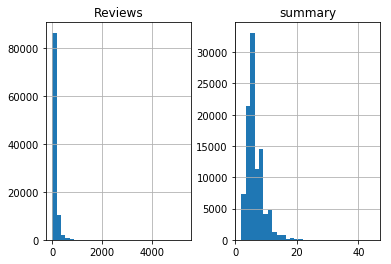

In [20]:
reviews_word_count = []
sum_word_count = []

for i in reviews_sent:
      reviews_word_count.append(len(i.split()))

for i in sum_sent:
      sum_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Reviews':reviews_word_count, 'summary':sum_word_count})
length_df.hist(bins = 30)
plt.show()

In [21]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packag

## Tokenize: text_to_word_sequence

In [22]:
# VOCAB_SIZE = 800
# tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

In [23]:
# We've already cleaned up the data
# Though we could use this for cleaning also
reviews_tokenizer = Tokenizer()

In [24]:
r_tokenizer = Tokenizer()
r_tokenizer.fit_on_texts(reviews_sent)
reviews_sequences = r_tokenizer.texts_to_sequences(reviews_sent)
reviews_word_index = r_tokenizer.word_index
len(reviews_word_index)

60875

In [25]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(sum_sent)
summary_sequences = s_tokenizer.texts_to_sequences(sum_sent)
sum_word_index = s_tokenizer.word_index
len(sum_word_index)

14166

In [26]:
reviews_vocab_size = len(reviews_word_index) + 1
reviews_vocab_size

60876

In [27]:
sum_vocab_size = len(sum_word_index) + 1
sum_vocab_size

14167

### Max len of the sequences

In [28]:
max_reviews_seq_len = max([len(seq) for seq in reviews_sequences])
max_reviews_seq_len

5294

In [29]:
max_summary_seq_len = max([len(seq) for seq in summary_sequences])
max_summary_seq_len

45

### Vocabulary size

In [30]:
# VOCAB_SIZE = len(reviews_word_index) - 10
# VOCAB_SIZE

In [31]:
# reviews_word_index_vsize = {}
# counter = 0
# for word in reviews_word_index.keys():
#     if reviews_word_index[word] == 0:
#         print("found 0!")
#         break
#     if reviews_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         reviews_word_index_vsize[word] = reviews_word_index[word]
#         counter += 1

In [32]:
# len(reviews_word_index_vsize)

In [33]:
# sum_word_index_vsize = {}
# counter = 0
# for word in sum_word_index.keys():
#     if sum_word_index[word] == 0:
#         print("found 0!")
#         break
#     if sum_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         sum_word_index_vsize[word] = sum_word_index[word]
#         counter += 1

In [34]:
# len(sum_word_index_vsize)

### Padding

In [35]:
from keras.preprocessing.sequence import pad_sequences
# MAX_LEN = max_reviews_seq_len
pad_reviews_sequences = pad_sequences(reviews_sequences, maxlen=max_reviews_seq_len, padding='post', truncating='post')

In [36]:
print(len(reviews_sequences[0]), len(pad_reviews_sequences[0]))

30 5294


In [37]:
print(pad_reviews_sequences)

[[ 17 807 266 ...   0   0   0]
 [  2  72   9 ...   0   0   0]
 [ 83   7  57 ...   0   0   0]
 ...
 [  2  73  77 ...   0   0   0]
 [  2  49 367 ...   0   0   0]
 [  9 232   7 ...   0   0   0]]


In [38]:
pad_reviews_sequences.shape

(100000, 5294)

In [39]:
pad_sum_sequences = pad_sequences(summary_sequences, maxlen=max_summary_seq_len, padding='post', truncating='post')

In [40]:
print(len(summary_sequences[0]), len(pad_sum_sequences[0]))

4 45


In [41]:
pad_sum_sequences.shape

(100000, 45)

### Reshape

In [42]:
encoder_inputs = np.zeros((num_samples, max_reviews_seq_len), dtype='float32')
encoder_inputs.shape

for i, seqs in enumerate(pad_reviews_sequences):
    for j, seq in enumerate(seqs):
        encoder_inputs[i, j] = seq
        

In [43]:
encoder_inputs.shape

(100000, 5294)

In [44]:

decoder_inputs = np.zeros((num_samples, max_summary_seq_len), dtype='float32')
decoder_inputs.shape
        
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        decoder_inputs[i, j] = seq

In [45]:
decoder_inputs.shape

(100000, 45)

In [46]:
decoder_outputs = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype='float32')
decoder_outputs.shape

(100000, 45, 14167)

In [47]:
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        decoder_outputs[i, j, seq] = 1.

In [48]:
decoder_outputs.shape

(100000, 45, 14167)

## Glove embeddings

In [49]:
embeddings_index = {}
with open('/Users/gkhanna/Downloads/glove.6B/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [50]:
def embedding_matrix_creater(embedding_dimension, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [51]:
reviews_embedding_matrix = embedding_matrix_creater(50, word_index=reviews_word_index)
reviews_embedding_matrix.shape

(60876, 50)

In [52]:
len(reviews_embedding_matrix)

60876

In [53]:
sum_embedding_matrix = embedding_matrix_creater(50, word_index=sum_word_index)
sum_embedding_matrix.shape

(14167, 50)

In [54]:
from numpy.random import seed
seed(1)

In [55]:
import logging

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
import keras
from keras import backend as k
k.clear_session()
k.set_learning_phase(1)

W0728 22:54:13.777978 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0728 22:54:13.779467 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 22:54:13.797811 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [58]:
from keras.preprocessing.text import Tokenizer
from keras import initializers
from keras.optimizers import RMSprop
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Add,concatenate, Embedding, RepeatVector
from keras.layers.advanced_activations import LeakyReLU,PReLU
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


In [59]:
from keras.layers import TimeDistributed, Concatenate

In [60]:
from insights.attention import AttentionLayer

### Hyperparams

In [61]:
# Hyperparams

# MAX_LEN = 1000
# VOCAB_SIZE = len(sum_embedding_matrix)
EMBEDDING_DIM = 50
HIDDEN_UNITS = 20
# VOCAB_SIZE = VOCAB_SIZE + 1

LEARNING_RATE = 0.002
BATCH_SIZE = 32
EPOCHS = 20

### Embedding Layer

In [62]:
# encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_reviews_seq_len,
#                                     weights = [reviews_embedding_matrix],
#                                     trainable = False)

# decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_summary_seq_len,
#                                     weights = [sum_embedding_matrix],
#                                     trainable = False)

In [63]:
encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [reviews_embedding_matrix],
                                    trainable = False)

decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [sum_embedding_matrix],
                                    trainable = False)

In [64]:
sum_vocab_size

14167

## Model

### LSTM

In [65]:
## # encoder
encoder_inputs = Input(shape=(max_reviews_seq_len, ), dtype = 'int32',)
encoder_embedding = encoder_embedding_layer(encoder_inputs)

# LSTM 1
encoder_LSTM1 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_output1, state_h1, state_c1 = encoder_LSTM1(encoder_embedding)

# LSTM 2
encoder_LSTM2 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_outputs, state_h, state_c = encoder_LSTM2(encoder_output1)


encoder_states = [state_h, state_c]

# decoder
# decoder_inputs = Input(shape=(max_summary_seq_len, ), dtype = 'int32')
decoder_inputs = Input(shape=(None, ), dtype = 'int32')
decoder_embedding = decoder_embedding_layer(decoder_inputs)

# Decoder LSTM with encoder_states as the initial state
decoder_LSTM = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
decoder_outputs, state_d_h, state_d_c = decoder_LSTM(decoder_embedding, initial_state = [state_h, state_c])

# Dense Layer
decoder_dense = TimeDistributed(Dense(units=sum_vocab_size, activation="softmax"))
decoder_outputs = decoder_dense(decoder_outputs) # SUM_VOCAB_SIZE, sum_embedding_matrix.shape[1]

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


W0728 22:54:13.856377 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 22:54:13.889212 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 5294)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 5294, 50)     3043800     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 5294, 20), ( 5680        embedding_1[0][0]                
__________________________________________________________________________________________________
embedding_

In [66]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

W0728 22:54:15.841567 140735691277184 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## TRAINING

In [67]:
# history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [68]:
num_samples = len(pad_sum_sequences)
decoder_output_data = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype="int32")


In [69]:
pad_sum_sequences.shape

(100000, 45)

In [70]:
decoder_output_data.shape

(100000, 45, 14167)

In [71]:
# Output
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j][seq] = 1

In [72]:
reviews_train, reviews_test, sum_train, sum_test = train_test_split(pad_reviews_sequences, pad_sum_sequences, test_size=0.2)

In [73]:
train_num = reviews_train.shape[0]
train_num

80000

In [74]:
reviews_train.shape

(80000, 5294)

In [75]:
reviews_test.shape

(20000, 5294)

In [76]:
sum_train.shape

(80000, 45)

In [77]:
sum_test.shape

(20000, 45)

In [78]:
target_train = decoder_output_data[:train_num]
target_test = decoder_output_data[train_num:]

In [79]:
target_train.shape

(80000, 45, 14167)

In [80]:
target_test.shape

(20000, 45, 14167)

In [81]:
target_train.shape

(80000, 45, 14167)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history = model.fit([reviews_train, sum_train], 
                     target_train, 
                     epochs=EPOCHS,
                     callbacks = [es],
                     batch_size=BATCH_SIZE,
                     validation_data=([reviews_test, sum_test], target_test))

W0728 22:54:39.058580 140735691277184 deprecation.py:323] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 80000 samples, validate on 20000 samples
Epoch 1/20
  384/80000 [..............................] - ETA: 6:06:11 - loss: 9.2555 - acc: 0.7249

In [ ]:
decoder_outputs.shape

In [ ]:
decoder_inputs.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Reverse Tokenize

In [ ]:
reverse_source_word_index=r_tokenizer.index_word 
reverse_target_word_index=s_tokenizer.index_word 
target_word_index = s_tokenizer.word_index

In [ ]:
len(reverse_source_word_index)

### inference encoder and decoder

In [ ]:
# Encoder inference
inf_encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

In [ ]:
# Decoder inference

# State of the previous time step
decoder_state_input_h = Input(shape=(HIDDEN_UNITS,))
decoder_state_input_c = Input(shape=(HIDDEN_UNITS,))
decoder_hidden_state_input = Input(shape=(max_reviews_seq_len, HIDDEN_UNITS))

# Embeddings of the decoder sequence
decoder_embeddings2 = decoder_embedding_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_LSTM(decoder_embeddings2, initial_state= [decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

# decoder_outputs, state_h, state_c = decoder_LSTM(decoder_embedding,  initial_state=decoder_state_inputs)
# decoder_states = [state_h, state_c]
# decoder_outputs = decoder_dense(decoder_outputs)
# inf_decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs] + decoder_states)

In [ ]:
inf_encoder_model.summary()

In [ ]:
decoder_model.summary()

## Inference process

In [ ]:


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # target_seq = np.array([0.0 for _ in range(max_reviews_seq_len)]).reshape(1, max_reviews_seq_len)

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        print(sampled_token_index)
        # sampled_token = reverse_target_word_index[sampled_token_index]
        # Want to get a default instead of a key error
        sampled_token = reverse_target_word_index.get(sampled_token_index, "NA")
        print(sampled_token)
        
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_summary_seq_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# Integer sequence to words

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2review(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(reviews_train[:5])):
    print("Review:",seq2review(reviews_test[i]))
    print()
    print("Original summary:",seq2summary(sum_test[i]))
    print()
    print("Predicted summary:",decode_sequence(reviews_test[i].reshape(1, max_reviews_seq_len)))
    print("\n")

In [ ]:
# state = inf_encoder_model.predict(reviews_test)

In [ ]:

# cardinality = 720
# n_steps = 4
# output = list()

# target_seq = np.array([0.0 for _ in range(cardinality)]).reshape(1, cardinality)

# yhat, h, c = inf_decoder_model.predict([target_seq] + state)
# # store prediction
# output.append(yhat[0,0,:])
# # update state
# state = [h, c]
    

In [ ]:
# def lookup(tokenizer, vec, returnIntNotWord=True):
#     twordkey = [(k, tokenizer.word_index[k]) for k in sorted(tokenizer.word_index, key=tokenizer.word_index.get, reverse=False)]
#     oneHotVec = [] #captures the index of the ords
#     engVec = [] #this one returns the indexs and the words. Make sure returnIntNotWord is false though
#     for eachRow, notUsed in enumerate(vec):
#         for index, item in enumerate(vec[0]):
#             if vec[eachRow][index] == 1:
#                 oneHotVec.append(index)
#     for index in oneHotVec:
#         engVec.append(twordkey[index])
#     if returnIntNotWord == True:
#         return oneHotVec
#     else:
#         return engVec

In [ ]:
input_seq = reviews_test[0].reshape(1, max_reviews_seq_len)
input_seq.shape

In [ ]:
reviews_test[0].shape

In [ ]:
e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

In [ ]:
e_out.shape

In [ ]:
e_h.shape

In [ ]:
e_h

In [ ]:
e_out

In [ ]:
target_seq = np.array([0.0 for _ in range(max_reviews_seq_len)]).reshape(1, max_reviews_seq_len)

In [ ]:
target_seq.shape

In [ ]:
target_seq[0, 0] = target_word_index['start']

In [ ]:
target_seq[0, 0]

In [ ]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

In [ ]:
output_tokens.shape

In [ ]:
h

In [ ]:
c

In [ ]:
output_tokens

In [ ]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])

In [ ]:
sampled_token_index

In [ ]:
out = output_tokens[0, -1, :]

In [ ]:
out.shape

In [ ]:
from insights.attention import AttentionLayer
